In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_champagne = pd.read_csv('perrin-freres-monthly-champagne.csv')

In [3]:
df_champagne.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df_champagne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [5]:
df_champagne.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [6]:
df_champagne.dropna(inplace=True)

In [7]:
df_champagne['Month'] = pd.to_datetime(df_champagne['Month'])

In [8]:
df_champagne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Month                                                   105 non-null    datetime64[ns]
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [9]:
df_champagne.set_index('Month', inplace=True)

In [10]:
df_champagne.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Month'>

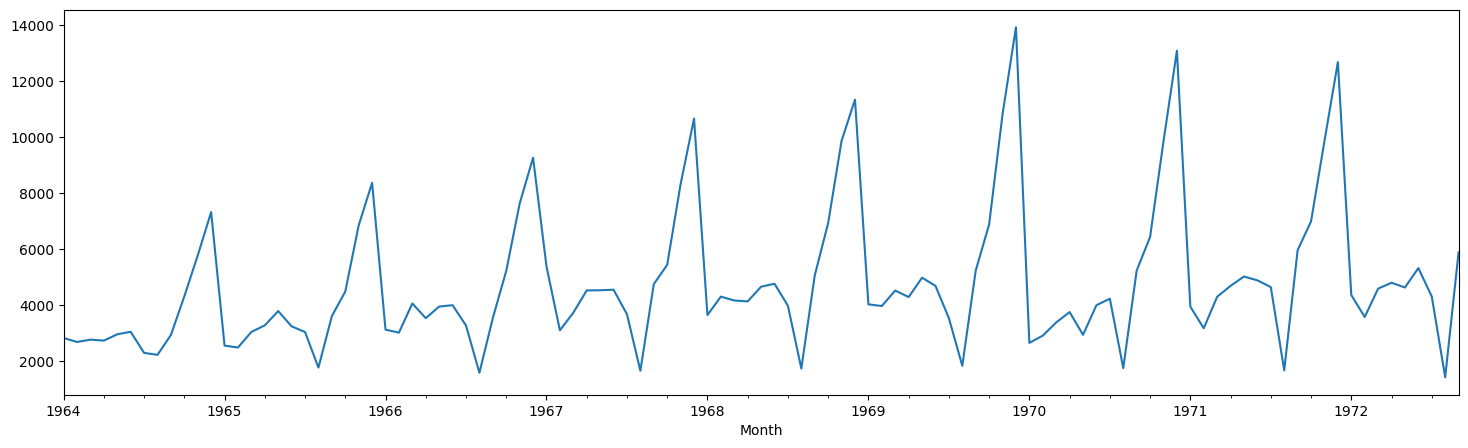

In [11]:
df_champagne['Perrin Freres monthly champagne sales millions ?64-?72'].plot(figsize=(18,5))

In [12]:
from statsmodels.tsa.stattools import adfuller

In [126]:
d=[]

In [125]:
def adf_test(series):
    results = adfuller(series)
    print("ADF value : {}".format(results[0]))
    print("p value : {}".format(results[1]))
    if results[1] <= 0.05:
        print("Strong evidence against null hypothesis, reject H0. Data has no unit root and is stationary.")
        return True
    else:
        print("Weak evidence against H0 found, so time-series has a unit root, indicating it is non-stationary.")
        return False

In [14]:
adf_test(df_champagne)

ADF value : -1.8335930563276175
p value : 0.3639157716602477
Weak evidence against H0 found, so time-series has a unit root, indicating it is non-stationary.


In [15]:
df_champagne['first difference'] = df_champagne['Perrin Freres monthly champagne sales millions ?64-?72'].shift(1)-df_champagne['Perrin Freres monthly champagne sales millions ?64-?72']

In [16]:
df_champagne['rev first difference'] = df_champagne['Perrin Freres monthly champagne sales millions ?64-?72']-df_champagne['Perrin Freres monthly champagne sales millions ?64-?72'].shift(1)

In [109]:
df_champagne['second diff'] = df_champagne['Perrin Freres monthly champagne sales millions ?64-?72'].shift(2) - df_champagne['Perrin Freres monthly champagne sales millions ?64-?72']

In [111]:
adf_test(df_champagne['second diff'].dropna())

ADF value : -7.135995302286727
p value : 3.419989159472811e-10
Strong evidence against null hypothesis, reject H0. Data has no unit root and is stationary.


In [128]:
for i in range(1,100):
    df_champagne['test'] = df_champagne['Perrin Freres monthly champagne sales millions ?64-?72'].shift(i) - df_champagne['Perrin Freres monthly champagne sales millions ?64-?72']
    print(f'------------{i}------------')
    if(adf_test(df_champagne['test'].dropna())):
        d.append(i)

------------1------------
ADF value : -7.1898964480509955
p value : 2.5196204473871266e-10
Strong evidence against null hypothesis, reject H0. Data has no unit root and is stationary.
------------2------------
ADF value : -7.135995302286727
p value : 3.419989159472811e-10
Strong evidence against null hypothesis, reject H0. Data has no unit root and is stationary.
------------3------------
ADF value : -7.285630595925715
p value : 1.4614244887642533e-10
Strong evidence against null hypothesis, reject H0. Data has no unit root and is stationary.
------------4------------
ADF value : -7.253149049898576
p value : 1.7585799498508142e-10
Strong evidence against null hypothesis, reject H0. Data has no unit root and is stationary.
------------5------------
ADF value : -2.8571173948550026
p value : 0.05056674353589858
Weak evidence against H0 found, so time-series has a unit root, indicating it is non-stationary.
------------6------------
ADF value : -7.278597607548263
p value : 1.52122089576592

In [129]:
d

[1,
 2,
 3,
 4,
 6,
 12,
 24,
 59,
 60,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 94,
 98,
 99]

In [131]:
df_champagne.head()

,Perrin Freres monthly champagne sales millions ?64-?72,first difference,rev first difference,second diff,test
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,143.0,-143.0,NaN,NaN
1964-03-01,2755.0,-83.0,83.0,60.0,NaN
1964-04-01,2721.0,34.0,-34.0,-49.0,NaN
1964-05-01,2946.0,-225.0,225.0,-191.0,NaN


In [18]:
adf_test(df_champagne['first difference'].dropna())

ADF value : -7.1898964480509955
p value : 2.5196204473871266e-10
Strong evidence against null hypothesis, reject H0. Data has no unit root and is stationary.


In [19]:
adf_test(df_champagne['rev first difference'].dropna())

ADF value : -7.1898964480509955
p value : 2.5196204473871266e-10
Strong evidence against null hypothesis, reject H0. Data has no unit root and is stationary.


In [20]:
from statsmodels.tsa.stattools import acf, pacf

In [21]:
acf = acf(df_champagne['first difference'].dropna())

In [22]:
acf

array([ 1.        , -0.08949605, -0.22953931, -0.10124501, -0.29646583,
        0.12825207,  0.17177466,  0.16156079, -0.34315226, -0.08591622,
       -0.17794023, -0.06098694,  0.84015896, -0.04204155, -0.20761209,
       -0.10809329, -0.24913814,  0.10471638,  0.16046585,  0.14306375,
       -0.31857355])

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

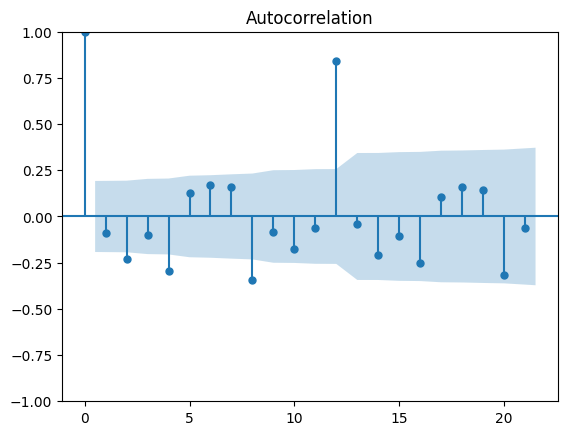

In [24]:
acf = plot_acf(df_champagne['first difference'].dropna())

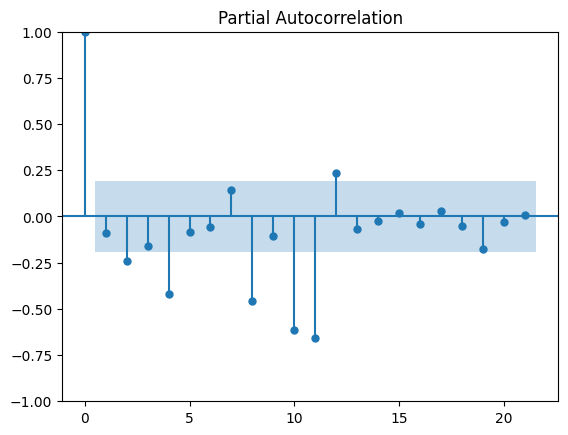

In [25]:
pacf = plot_pacf(df_champagne['first difference'].dropna())

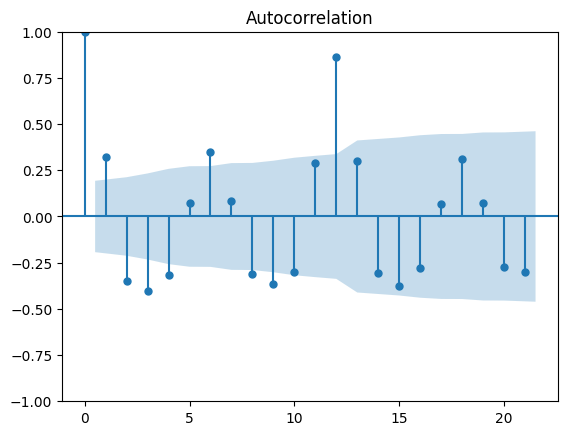

In [132]:
acf = plot_acf(df_champagne['second diff'].dropna())

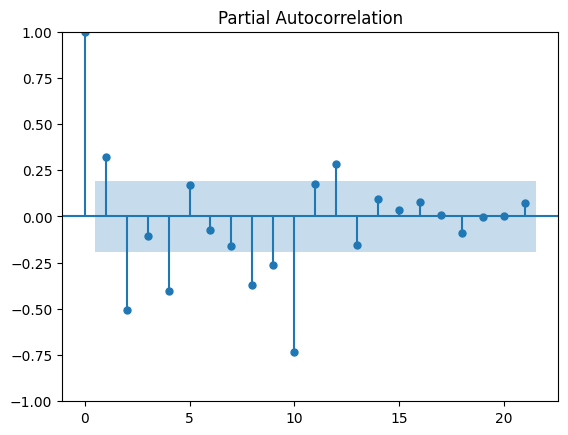

In [133]:
pacf = plot_pacf(df_champagne['second diff'].dropna())

In [143]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
train_data = df_champagne[:'1969-09-1']

In [28]:
train_data.tail()

,Perrin Freres monthly champagne sales millions ?64-?72,first difference,rev first difference
Month,,,
1969-05-01,4968.0,-692.0,692.0
1969-06-01,4677.0,291.0,-291.0
1969-07-01,3523.0,1154.0,-1154.0
1969-08-01,1821.0,1702.0,-1702.0
1969-09-01,5222.0,-3401.0,3401.0


In [29]:
test_data = df_champagne['1969-10-01':]

In [30]:
test_data.head()

,Perrin Freres monthly champagne sales millions ?64-?72,first difference,rev first difference
Month,,,
1969-10-01,6872.0,-1650.0,1650.0
1969-11-01,10803.0,-3931.0,3931.0
1969-12-01,13916.0,-3113.0,3113.0
1970-01-01,2639.0,11277.0,-11277.0
1970-02-01,2899.0,-260.0,260.0


In [44]:
arima_000 = ARIMA(train_data['Perrin Freres monthly champagne sales millions ?64-?72'])

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
arima1_trained_000 = arima_000.fit()

In [103]:
test_data.tail()

,Perrin Freres monthly champagne sales millions ?64-?72,first difference,rev first difference,pred_arima_000,pred_arima_010
Month,,,,,
1972-05-01,4618.0,170.0,-170.0,4373.471941,5222.0
1972-06-01,5312.0,-694.0,694.0,4373.471941,5222.0
1972-07-01,4298.0,1014.0,-1014.0,4373.471941,5222.0
1972-08-01,1413.0,2885.0,-2885.0,4373.471941,5222.0
1972-09-01,5877.0,-4464.0,4464.0,4373.471941,5222.0


In [53]:
pred = arima1_trained_000.predict(start='1969-10-01	',end='1972-09-01')

In [54]:
residuals = test_data['Perrin Freres monthly champagne sales millions ?64-?72']-pred

In [ ]:
residuals

<Axes: ylabel='Density'>

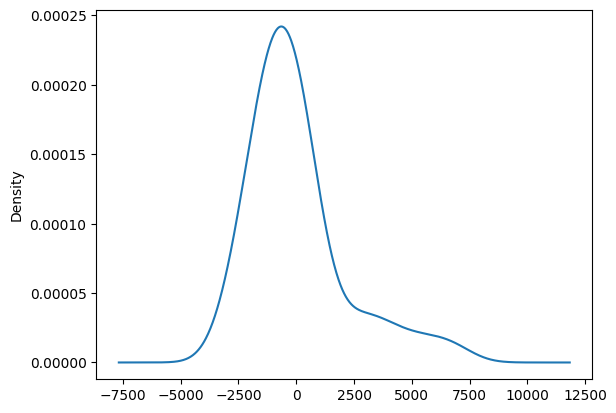

In [60]:
arima1_trained_000.resid.plot(kind='kde')

In [61]:
test_data['pred_arima_000'] = pred

C:\Users\saira\AppData\Local\Temp\ipykernel_11936\4030556641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred_arima_000'] = pred


In [62]:
test_data.head()

,Perrin Freres monthly champagne sales millions ?64-?72,first difference,rev first difference,pred_arima1,pred_arima_000
Month,,,,,
1969-10-01,6872.0,-1650.0,1650.0,4373.471941,4373.471941
1969-11-01,10803.0,-3931.0,3931.0,4373.471941,4373.471941
1969-12-01,13916.0,-3113.0,3113.0,4373.471941,4373.471941
1970-01-01,2639.0,11277.0,-11277.0,4373.471941,4373.471941
1970-02-01,2899.0,-260.0,260.0,4373.471941,4373.471941


<Axes: xlabel='Month'>

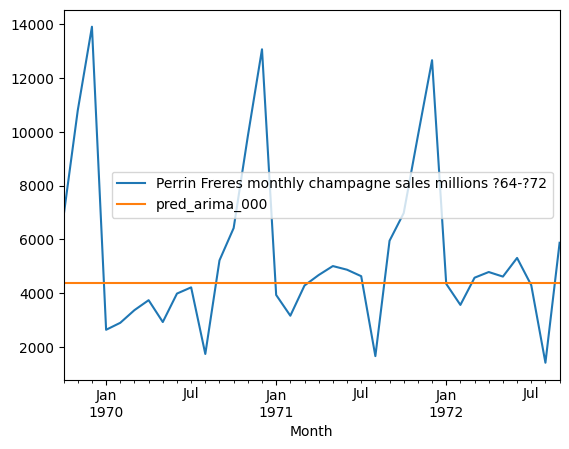

In [64]:
test_data[['Perrin Freres monthly champagne sales millions ?64-?72','pred_arima_000']].plot()

In [87]:
arima_010 = ARIMA(train_data['Perrin Freres monthly champagne sales millions ?64-?72'], order=(0,1,0))

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [88]:
arima1_trained_010 = arima_010.fit()

In [89]:
pred = arima1_trained_010.predict(start='1969-10-01	',end='1972-09-01')

In [90]:
residuals = test_data['Perrin Freres monthly champagne sales millions ?64-?72']-pred

<Axes: ylabel='Density'>

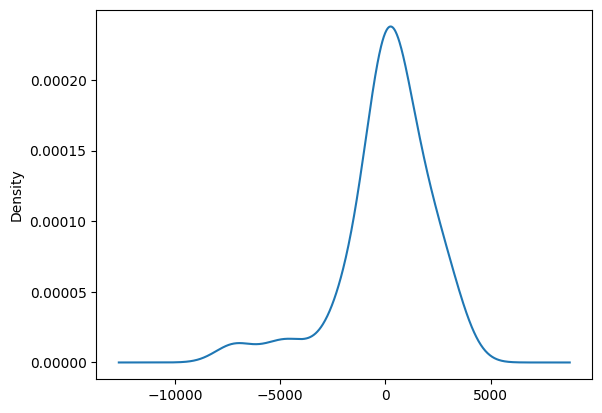

In [91]:
arima1_trained_010.resid.plot(kind='kde')

In [92]:
test_data['pred_arima_010'] = pred

C:\Users\saira\AppData\Local\Temp\ipykernel_11936\2816839190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred_arima_010'] = pred


<Axes: xlabel='Month'>

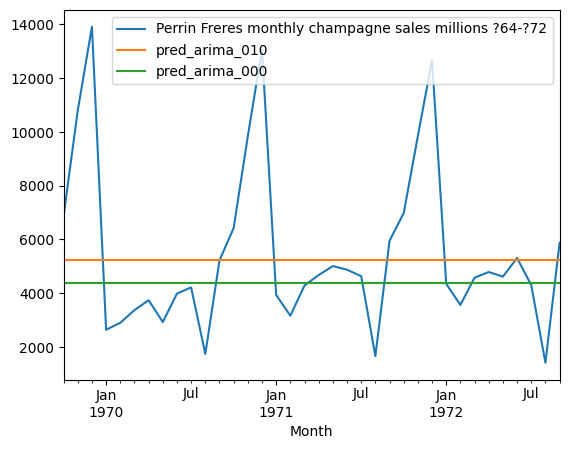

In [93]:
test_data[['Perrin Freres monthly champagne sales millions ?64-?72','pred_arima_010', 'pred_arima_000']].plot()

In [94]:
test_data.head()

,Perrin Freres monthly champagne sales millions ?64-?72,first difference,rev first difference,pred_arima1,pred_arima_000,pred_arima_010
Month,,,,,,
1969-10-01,6872.0,-1650.0,1650.0,4373.471941,4373.471941,5222.0
1969-11-01,10803.0,-3931.0,3931.0,4373.471941,4373.471941,5222.0
1969-12-01,13916.0,-3113.0,3113.0,4373.471941,4373.471941,5222.0
1970-01-01,2639.0,11277.0,-11277.0,4373.471941,4373.471941,5222.0
1970-02-01,2899.0,-260.0,260.0,4373.471941,4373.471941,5222.0


In [104]:
arima_11_1_12 = ARIMA(train_data['Perrin Freres monthly champagne sales millions ?64-?72'], order=(11,1,12))

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [105]:
arima1_trained_11_1_12 = arima_11_1_12.fit()

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [107]:
pred = arima1_trained_11_1_12.predict(start='1969-10-01	',end='1972-09-01')
residuals = test_data['Perrin Freres monthly champagne sales millions ?64-?72'] - pred

In [137]:
test_data['pred_arima_11_1_12'] = pred

<Axes: ylabel='Density'>

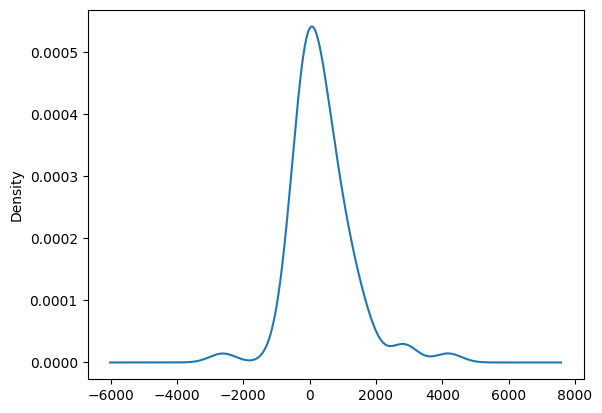

In [135]:
arima1_trained_11_1_12.resid.plot(kind='kde')

<Axes: xlabel='Month'>

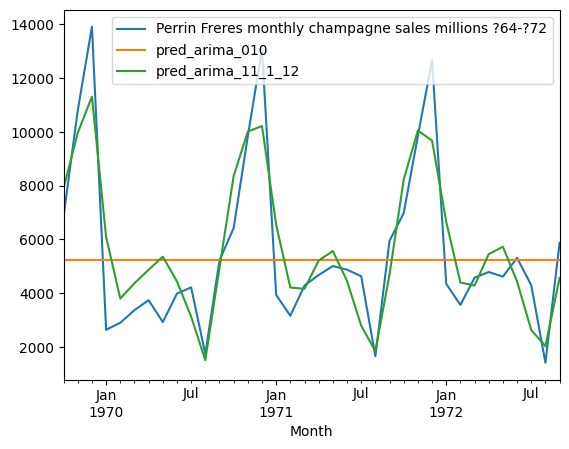

In [138]:
test_data[['Perrin Freres monthly champagne sales millions ?64-?72','pred_arima_010', 'pred_arima_11_1_12']].plot()

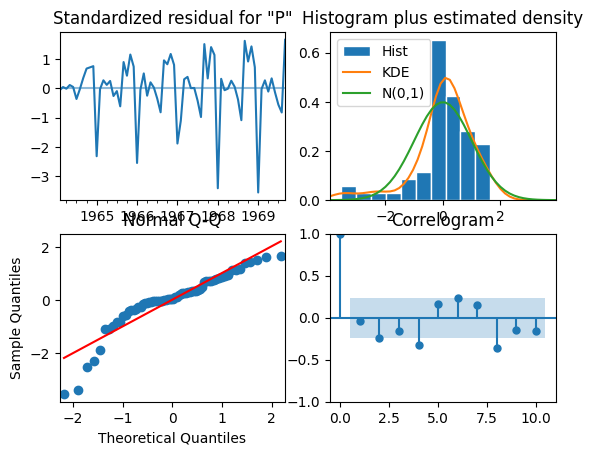

In [140]:
diagnostics_010 = arima1_trained_010.plot_diagnostics()

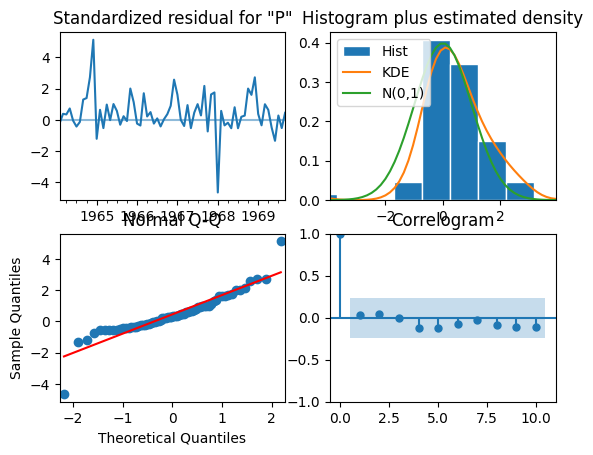

In [141]:
diagnostics_11_1_12 = arima1_trained_11_1_12.plot_diagnostics()

In [146]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [149]:
sarimax_000_0000 = SARIMAX(train_data['Perrin Freres monthly champagne sales millions ?64-?72'], order=(0,0,0), seasonal_order=(0,0,0,0))

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [150]:
sarimax_000_0000 = sarimax_000_0000.fit()

In [151]:
pred = sarimax_000_0000.predict(start='1969-10-01	',end='1972-09-01')
residuals = test_data['Perrin Freres monthly champagne sales millions ?64-?72'] - pred

In [153]:
test_data['pred_sarimax_000_0000'] = pred

<Axes: xlabel='Month'>

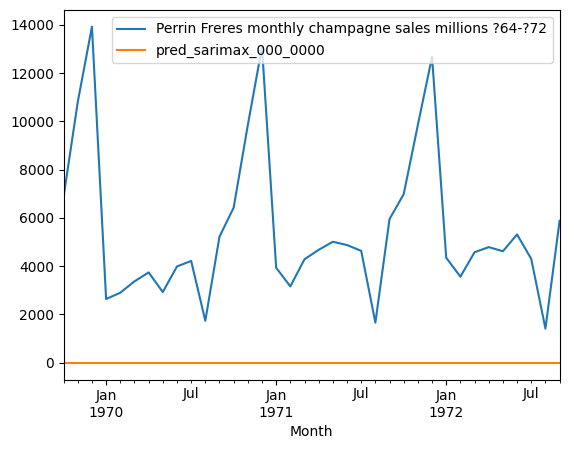

In [155]:
test_data[['Perrin Freres monthly champagne sales millions ?64-?72', 'pred_sarimax_000_0000']].plot()

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

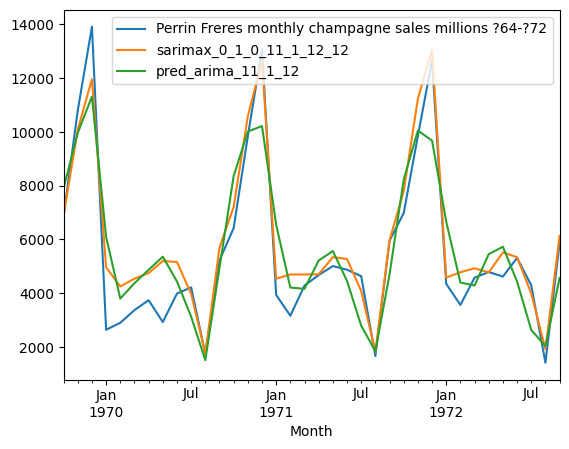

In [165]:
sarimax = SARIMAX(train_data['Perrin Freres monthly champagne sales millions ?64-?72'], order=(0,1,0), seasonal_order=(11,1,12,12))
sarimax = sarimax.fit()
pred = sarimax.predict(start='1969-10-01',end='1972-09-01')
test_data['sarimax_0_1_0_11_1_12_12'] = pred
test_data[['Perrin Freres monthly champagne sales millions ?64-?72', 'sarimax_0_1_0_11_1_12_12' ,'pred_arima_11_1_12']].plot()

To Do :-

1) Improve arima and sarima models

2) Use autoarima